In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Build the Sequential convolutional neural network model
CNN_model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', strides = 2, input_shape=(28, 28, 1), data_format='channels_last'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

In [7]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,890
Trainable params: 12,890
Non-trainable params: 0
__________________________________________________

In [8]:
W_B_model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

In [9]:
#Adding some layers to our model
W_B_model.add(Dense(64,
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                bias_initializer=tf.keras.initializers.Constant(value=0.4),
                activation='relu'),)

W_B_model.add(Dense(8,
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None),
                bias_initializer=tf.keras.initializers.Constant(value=0.4),
                activation='relu'))

In [10]:
W_B_model.weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 64, 16) dtype=float32, numpy=
 array([[[-0.0452905 , -0.0307135 ,  0.04411569, ..., -0.00050948,
           0.01574088, -0.01040963],
         [ 0.03000205,  0.00025688, -0.00157066, ...,  0.01016798,
           0.01640112, -0.02738242],
         [ 0.03499014,  0.01594924, -0.02944996, ...,  0.03622857,
          -0.02824397, -0.03390833],
         ...,
         [-0.04287672,  0.03907443, -0.04744883, ...,  0.04245622,
          -0.03358078,  0.01645496],
         [-0.01946398, -0.00255313,  0.00531147, ..., -0.00648705,
           0.01887263,  0.01371979],
         [-0.02968832, -0.04143709, -0.0010292 , ..., -0.03303017,
          -0.01491238, -0.03715825]],
 
        [[-0.01862269, -0.00066928, -0.00229008, ..., -0.04227903,
          -0.03494986, -0.03226954],
         [ 0.02016291,  0.00276025,  0.00493374, ...,  0.00068631,
           0.03264972, -0.03848539],
         [ 0.00716882,  0.03493334, -0.03763858, ..., -0.01791638,
           0

In [11]:
#Example of a custom initializer
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

W_B_model.add(Dense(64, kernel_initializer=my_init))

In [12]:
W_B_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                31808     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                      

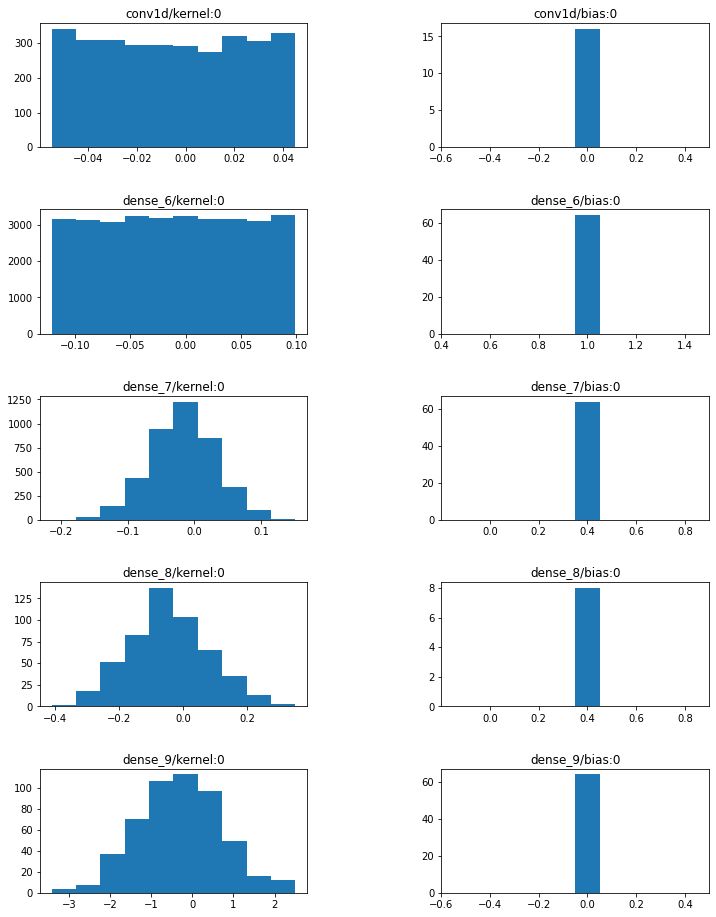

In [13]:

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in W_B_model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [27]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [28]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(optimizer = opt, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = [acc, mae])

CNN_model.compile(optimizer = opt, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = [acc, mae])           

W_B_model.compile(optimizer = opt, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = [acc, mae])          

In [30]:
# Print the resulting model attributes
print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
sparse_categorical_crossentropy
[]


In [32]:
# Fit the model

# hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=256 ,verbose=1)
hist = CNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=256 ,verbose=1)
# hist = W_B_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=256 ,verbose=1)

Epoch 1/5
235/235 [==============================] - 5s 6ms/step - loss: 2.2073 - sparse_categorical_accuracy: 0.4699 - mean_absolute_error: 4.4200 - val_loss: 0.8641 - val_sparse_categorical_accuracy: 0.6785 - val_mean_absolute_error: 4.4200
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.7432 - sparse_categorical_accuracy: 0.7243 - mean_absolute_error: 4.4200 - val_loss: 0.7203 - val_sparse_categorical_accuracy: 0.7393 - val_mean_absolute_error: 4.4200
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6772 - sparse_categorical_accuracy: 0.7511 - mean_absolute_error: 4.4200 - val_loss: 0.6833 - val_sparse_categorical_accuracy: 0.7554 - val_mean_absolute_error: 4.4200
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6589 - sparse_categorical_accuracy: 0.7565 - mean_absolute_error: 4.4200 - val_loss: 0.6819 - val_sparse_categorical_accuracy: 0.7508 - val_mean_absolute_error: 4.4200
Epoch 5/5
235/235 [=========

In [33]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(hist.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error,val_loss,val_sparse_categorical_accuracy,val_mean_absolute_error
0,2.207263,0.469857,4.420000,0.864107,0.6785,4.42
1,0.743222,0.724317,4.420000,0.720313,0.7393,4.42
2,0.677227,0.751083,4.420001,0.683287,0.7554,4.42
3,0.658869,0.756483,4.420000,0.681913,0.7508,4.42
4,0.642944,0.761500,4.419999,0.665596,0.7545,4.42


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

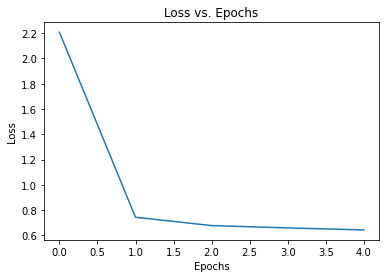

In [34]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

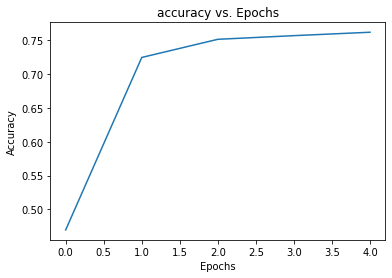

In [35]:
# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy", title="accuracy vs. Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'MAE')]

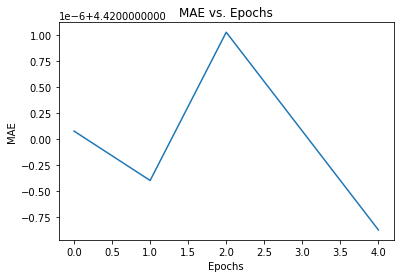

In [36]:
# Make a plot for the additional metric
mae_plot = df.plot(y="mean_absolute_error", title="MAE vs. Epochs", legend=False)
mae_plot.set(xlabel="Epochs", ylabel="MAE")

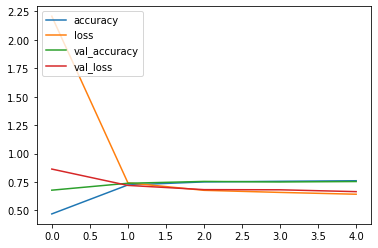

In [37]:
plt.plot(hist.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [38]:
# Evaluate the model
# loss, accuracy, mae = model.evaluate(test_images, test_labels)
loss, accuracy, mae = CNN_model.evaluate(test_images, test_labels)
# loss, accuracy, mae = W_B_model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 4ms/step - loss: 0.6656 - sparse_categorical_accuracy: 0.7545 - mean_absolute_error: 4.4200


In [39]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

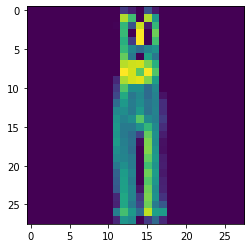

Label: Trouser


In [40]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [41]:
# Get the model predictions

# prediction = model.predict(test_image[np.newaxis, ... , np.newaxis])
# prediction = model.predict(test_image.reshape(1, 28, 28, 1))
prediction = CNN_model.predict(test_image.reshape(1, 28, 28, 1))
# prediction = W_B_model.predict(test_image.reshape(1, 28, 28, 1))
print(prediction)
print(f"Model prediction: {labels[np.argmax(prediction)]}")

[[4.4153811e-04 6.4614981e-01 3.5284062e-05 3.4925431e-01 1.1858632e-03
  8.7491273e-05 3.6477321e-04 1.7009871e-03 2.6374712e-04 5.1621353e-04]]
Model prediction: Trouser
